In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
df=pd.read_csv("Crime_data.csv")

In [3]:
# pd.set_option('max_rows', None)

In [4]:
df

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District
0,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
1,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
2,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
3,"6/24/2023, 10:01 AM",3JK,600 LUCIA AVE,ROBBERY,PERSONAL_WEAPONS,M,25.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
4,"6/24/2023, 9:45 AM",5A,3200 LILY AVE,BURGLARY,NaN,M,48.0,NaN,SOUTHERN
...,...,...,...,...,...,...,...,...,...
2995,"5/5/2023, 4:00 AM",5B,6800 FAIT AVE,BURGLARY,NaN,NaN,NaN,NaN,SOUTHEAST
2996,"5/5/2023, 3:00 AM",7C,5700 MAPLEHILL RD,AUTO THEFT,NaN,F,41.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST
2997,"5/4/2023, 10:00 PM",6D,1600 HOMESTEAD ST,LARCENY FROM AUTO,NaN,M,64.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST
2998,"5/5/2023, 5:00 AM",7C,1300 GUILFORD AVE,AUTO THEFT,NaN,F,35.0,BLACK_OR_AFRICAN_AMERICAN,CENTRAL


In [5]:
df.shape

(3000, 9)

# Null Value Handling

In [6]:
df.isna().sum()

CrimeDateTime       0
CrimeCode           0
Location           15
Description         0
Weapon           1817
Victim_Gender     332
Victim_Age        355
Victim_Race       616
District            2
dtype: int64

In [7]:
df['Location'].fillna('Unknown', inplace=True)

In [8]:
df.Location.value_counts()

Unknown                15
3600 CLARINTH RD       13
3500 BOSTON ST         11
600 E PRATT ST          9
3600 POTEE ST           9
                       ..
0 S EUTAW ST            1
4100 WOODHAVEN AVE      1
4200 GLENARM AVE        1
900 Stubblefield Ln     1
2400 FLEETWOOD AVE      1
Name: Location, Length: 2083, dtype: int64

In [9]:
df['Weapon'].fillna("Other",inplace=True)

In [10]:
df.Weapon.isna().sum()

0

In [11]:
df.Weapon.value_counts()

Other                       1817
PERSONAL_WEAPONS             740
HANDGUN                      137
FIREARM                       93
KNIFE_CUTTING_INSTRUMENT      68
BLUNT_OBJECT                  52
OTHER                         49
UNKNOWN                       15
AUTOMATIC_HANDGUN              9
MOTOR_VEHICLE_VESSEL           8
ASPHYXIATION                   4
RIFLE                          4
KNIFE                          2
OTHER_FIREARM                  1
SHOTGUN                        1
Name: Weapon, dtype: int64

In [12]:
df.Victim_Gender.value_counts()

F             1421
M             1167
Male            56
U               15
Female           8
Transgende       1
Name: Victim_Gender, dtype: int64

In [13]:
df['Victim_Gender'] = df['Victim_Gender'].replace({'Female': 'F', 'Male': 'M'})


In [14]:
df['Victim_Gender'].value_counts()

F             1429
M             1223
U               15
Transgende       1
Name: Victim_Gender, dtype: int64

In [15]:
df['Victim_Gender'].fillna("U",inplace=True)

In [16]:
df['Victim_Gender'].value_counts()

F             1429
M             1223
U              347
Transgende       1
Name: Victim_Gender, dtype: int64

In [17]:
df['Victim_Gender'].isna().sum()

0

In [18]:
df['Victim_Age'].max()

99.0

In [19]:
df['Victim_Age'].min()     

0.0

In [20]:
df['Victim_Age'].unique() 

array([15., 27., 25., 48., 30., 41., 21., 40., 29., 38., 54., 17., 39.,
       22., 35., 76., 47., 37., 75., 24., 19., 31., 36., 49., 33., 46.,
       78., 50., 28., 84., 53., 59., 32., 61., 26., 67., 57., 10., 18.,
       62., 13., 42., nan, 34., 72., 56., 20., 51., 73., 66., 65., 45.,
        8., 70., 23., 16., 52., 43., 68., 55., 44., 60., 71., 58., 64.,
       74., 14., 12.,  2., 69., 81., 63., 88., 79.,  7.,  4., 80., 77.,
        3., 83., 11., 82.,  9.,  0.,  1.,  5., 99.])

C:\Users\Abdur rahim nishad\AppData\Local\Temp\ipykernel_6796\1380858686.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Victim_Age'])


<Axes: ylabel='Density'>

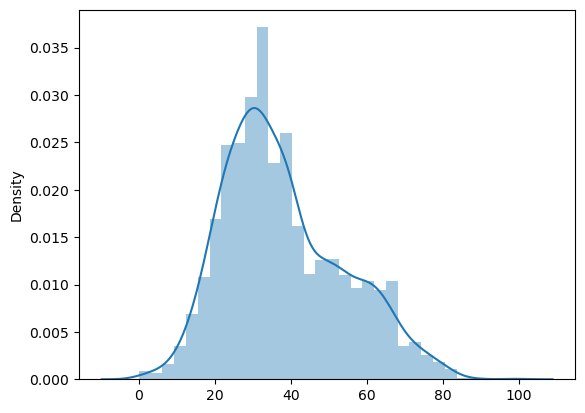

In [21]:
sns.distplot(x=df['Victim_Age'])

In [22]:
round(df.Victim_Age.mean())

38

In [23]:
df.Victim_Age.fillna(round(df.Victim_Age.mean()),inplace=True)

In [24]:
df.Victim_Age.isna().sum()

0

In [25]:
df.Victim_Race.value_counts()

BLACK_OR_AFRICAN_AMERICAN                    1712
WHITE                                         574
ASIAN                                          49
UNKNOWN                                        29
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER      12
AMERICAN_INDIAN_OR_ALASKA_NATIVE                8
Name: Victim_Race, dtype: int64

In [26]:
df["Victim_Race"].fillna("OTHER",inplace=True)

In [27]:
df["Victim_Race"].replace("UNKNOWN","OTHER",inplace=True)

In [28]:
df.Victim_Race.value_counts()

BLACK_OR_AFRICAN_AMERICAN                    1712
OTHER                                         645
WHITE                                         574
ASIAN                                          49
NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER      12
AMERICAN_INDIAN_OR_ALASKA_NATIVE                8
Name: Victim_Race, dtype: int64

In [29]:
df.District.value_counts()

NORTHEAST    471
SOUTHEAST    407
NORTHERN     353
SOUTHWEST    342
CENTRAL      340
SOUTHERN     335
NORTHWEST    303
EASTERN      232
WESTERN      215
Name: District, dtype: int64

In [30]:
df["District"].fillna(df["District"].mode()[0],inplace=True)

In [31]:
df.isna().sum()

CrimeDateTime    0
CrimeCode        0
Location         0
Description      0
Weapon           0
Victim_Gender    0
Victim_Age       0
Victim_Race      0
District         0
dtype: int64

In [32]:
df

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District
0,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
1,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
2,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
3,"6/24/2023, 10:01 AM",3JK,600 LUCIA AVE,ROBBERY,PERSONAL_WEAPONS,M,25.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST
4,"6/24/2023, 9:45 AM",5A,3200 LILY AVE,BURGLARY,Other,M,48.0,OTHER,SOUTHERN
...,...,...,...,...,...,...,...,...,...
2995,"5/5/2023, 4:00 AM",5B,6800 FAIT AVE,BURGLARY,Other,U,38.0,OTHER,SOUTHEAST
2996,"5/5/2023, 3:00 AM",7C,5700 MAPLEHILL RD,AUTO THEFT,Other,F,41.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST
2997,"5/4/2023, 10:00 PM",6D,1600 HOMESTEAD ST,LARCENY FROM AUTO,Other,M,64.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST
2998,"5/5/2023, 5:00 AM",7C,1300 GUILFORD AVE,AUTO THEFT,Other,F,35.0,BLACK_OR_AFRICAN_AMERICAN,CENTRAL


In [33]:
df.CrimeDateTime.str.split(", ")[0][1]

'10:01 AM'

In [34]:
df['Date'] = df.CrimeDateTime.apply(lambda x:x.split(", ")[0])

In [35]:
df['Time'] = df.CrimeDateTime.apply(lambda x:x.split(", ")[1])

In [36]:
df['Date']=pd.to_datetime(df['Date'])

In [37]:
df.head()

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
0,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
1,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
2,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
3,"6/24/2023, 10:01 AM",3JK,600 LUCIA AVE,ROBBERY,PERSONAL_WEAPONS,M,25.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
4,"6/24/2023, 9:45 AM",5A,3200 LILY AVE,BURGLARY,Other,M,48.0,OTHER,SOUTHERN,2023-06-24,9:45 AM


In [38]:
df.Time.value_counts()

2:00 AM     86
11:00 PM    78
3:00 AM     77
4:00 AM     71
12:00 AM    68
            ..
5:57 PM      1
8:40 PM      1
12:52 AM     1
6:10 PM      1
10:13 AM     1
Name: Time, Length: 674, dtype: int64

In [39]:
df.Date.value_counts()

2023-05-15    173
2023-05-07    151
2023-05-06    150
2023-05-16    143
2023-06-04    141
2023-06-22    135
2023-06-12    134
2023-04-26    132
2023-06-03    123
2023-06-14    123
2023-04-25    122
2023-06-23    121
2023-06-11    108
2023-06-21    107
2023-06-13    106
2023-04-27    100
2023-06-24     99
2023-06-02     98
2023-05-05     97
2023-04-24     77
2023-05-14     75
2023-05-17     70
2023-05-26     61
2023-05-08     49
2023-06-20     46
2023-06-15     44
2023-04-28     34
2023-05-25     33
2023-06-05     33
2023-05-04     31
2023-05-27     26
2023-06-01     19
2023-06-25     14
2023-04-17     10
2023-05-09      6
2023-04-16      4
2023-04-18      3
2023-05-18      2
Name: Date, dtype: int64

In [40]:
df.head()

,CrimeDateTime,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
0,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
1,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
2,"6/24/2023, 10:01 AM",4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
3,"6/24/2023, 10:01 AM",3JK,600 LUCIA AVE,ROBBERY,PERSONAL_WEAPONS,M,25.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
4,"6/24/2023, 9:45 AM",5A,3200 LILY AVE,BURGLARY,Other,M,48.0,OTHER,SOUTHERN,2023-06-24,9:45 AM


In [41]:
df=df.drop("CrimeDateTime",axis=1)

In [42]:
df

,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
0,4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
1,4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
2,4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
3,3JK,600 LUCIA AVE,ROBBERY,PERSONAL_WEAPONS,M,25.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM
4,5A,3200 LILY AVE,BURGLARY,Other,M,48.0,OTHER,SOUTHERN,2023-06-24,9:45 AM
...,...,...,...,...,...,...,...,...,...,...
2995,5B,6800 FAIT AVE,BURGLARY,Other,U,38.0,OTHER,SOUTHEAST,2023-05-05,4:00 AM
2996,7C,5700 MAPLEHILL RD,AUTO THEFT,Other,F,41.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,2023-05-05,3:00 AM
2997,6D,1600 HOMESTEAD ST,LARCENY FROM AUTO,Other,M,64.0,BLACK_OR_AFRICAN_AMERICAN,NORTHEAST,2023-05-04,10:00 PM
2998,7C,1300 GUILFORD AVE,AUTO THEFT,Other,F,35.0,BLACK_OR_AFRICAN_AMERICAN,CENTRAL,2023-05-05,5:00 AM


In [43]:
df[df["Victim_Age"]<=10]

,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time
66,4E,100 S CHARLES ST,COMMON ASSAULT,PERSONAL_WEAPONS,F,10.0,WHITE,CENTRAL,2023-06-14,11:34 PM
97,4E,300 E PRATT ST,COMMON ASSAULT,PERSONAL_WEAPONS,M,10.0,WHITE,CENTRAL,2023-06-24,10:10 PM
133,4E,1400 BLOOMFIELD AVE,COMMON ASSAULT,PERSONAL_WEAPONS,F,8.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-04,11:00 PM
335,3AF,2600 MILES AVE,ROBBERY,PERSONAL_WEAPONS,M,2.0,WHITE,NORTHERN,2023-05-17,2:50 AM
478,4C,3900 GLEN HUNT RD,AGG. ASSAULT,PERSONAL_WEAPONS,M,10.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-04-27,10:00 PM
743,4A,3600 CLARINTH RD,AGG. ASSAULT,HANDGUN,M,8.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-14,12:12 AM
796,4E,4500 PARKTON ST,COMMON ASSAULT,PERSONAL_WEAPONS,F,7.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-04-27,2:00 PM
820,4A,3600 CLARINTH RD,AGG. ASSAULT,HANDGUN,M,8.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-14,12:12 AM
903,4A,3600 CLARINTH RD,AGG. ASSAULT,HANDGUN,M,2.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-14,12:12 AM
905,4A,3600 CLARINTH RD,AGG. ASSAULT,HANDGUN,M,4.0,BLACK_OR_AFRICAN_AMERICAN,NORTHWEST,2023-06-14,12:12 AM


In [44]:
df['District'].value_counts()

NORTHEAST    473
SOUTHEAST    407
NORTHERN     353
SOUTHWEST    342
CENTRAL      340
SOUTHERN     335
NORTHWEST    303
EASTERN      232
WESTERN      215
Name: District, dtype: int64

In [45]:
df['Year']=df['Date'].dt.year

In [46]:
df['Day']=df['Date'].dt.day

In [47]:
df['Month']=df['Date'].dt.month_name()

In [48]:
df.head()

,CrimeCode,Location,Description,Weapon,Victim_Gender,Victim_Age,Victim_Race,District,Date,Time,Year,Day,Month
0,4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM,2023,24,June
1,4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,15.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM,2023,24,June
2,4B,600 LUCIA AVE,AGG. ASSAULT,PERSONAL_WEAPONS,F,27.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM,2023,24,June
3,3JK,600 LUCIA AVE,ROBBERY,PERSONAL_WEAPONS,M,25.0,BLACK_OR_AFRICAN_AMERICAN,SOUTHWEST,2023-06-24,10:01 AM,2023,24,June
4,5A,3200 LILY AVE,BURGLARY,Other,M,48.0,OTHER,SOUTHERN,2023-06-24,9:45 AM,2023,24,June


In [49]:
df.Month.value_counts()

June     1451
May      1067
April     482
Name: Month, dtype: int64

In [50]:
print(df[['Month','Day']].value_counts())

Month  Day
May    15     173
       7      151
       6      150
       16     143
June   4      141
       22     135
       12     134
April  26     132
June   14     123
       3      123
April  25     122
June   23     121
       11     108
       21     107
       13     106
April  27     100
June   24      99
       2       98
May    5       97
April  24      77
May    14      75
       17      70
       26      61
       8       49
June   20      46
       15      44
April  28      34
June   5       33
May    25      33
       4       31
       27      26
June   1       19
       25      14
April  17      10
May    9        6
April  16       4
       18       3
May    18       2
dtype: int64


In [51]:
df.groupby(['Month','Victim_Race']).size().reset_index(name='Count')

,Month,Victim_Race,Count
0,April,AMERICAN_INDIAN_OR_ALASKA_NATIVE,4
1,April,ASIAN,10
2,April,BLACK_OR_AFRICAN_AMERICAN,271
3,April,NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,4
4,April,OTHER,109
5,April,WHITE,84
6,June,AMERICAN_INDIAN_OR_ALASKA_NATIVE,4
7,June,ASIAN,25
8,June,BLACK_OR_AFRICAN_AMERICAN,830
9,June,NATIVE_HAWAIIAN_OR_OTHER_PACIFIC_ISLANDER,7


In [52]:
df.Victim_Age.dtype

dtype('float64')

In [53]:
df.Description.value_counts()

AUTO THEFT              760
COMMON ASSAULT          622
LARCENY                 532
AGG. ASSAULT            322
LARCENY FROM AUTO       261
ROBBERY                 184
BURGLARY                170
SHOOTING                 52
ROBBERY - CARJACKING     33
ROBBERY - COMMERCIAL     24
RAPE                     15
HOMICIDE                 13
ARSON                    12
Name: Description, dtype: int64

In [54]:
df.to_csv("Crime_clean_data.csv",index=False)